In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-11-29 11:29:25.198039: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

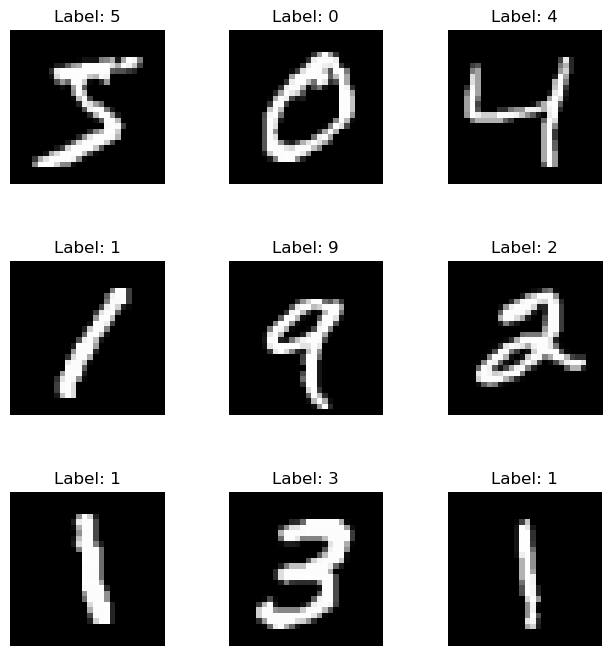

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(hspace=0.5)

# Display images in the subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')

# Show the plot
plt.show()

In [9]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28 )

In [10]:
print(X_train_flat.shape)
print(X_test_flat.shape)

(60000, 784)
(10000, 784)


In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
]
)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flat, y_train, epochs = 5)

2023-11-29 11:29:37.979874: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4678 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9256


In [12]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2713 - accuracy: 0.9222


[0.27126389741897583, 0.9222000241279602]

313/313 [==============================] - 1s 2ms/step


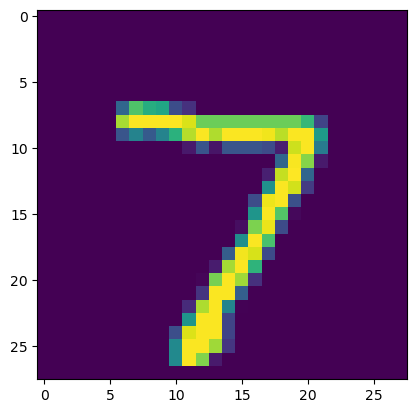

In [13]:
plt.imshow(X_test[0])


y_pred = model.predict(X_test_flat)

In [14]:
np.argmax(y_pred[0])

7

In [15]:
y_pred_labels = [ np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   8,    9,  897,   32,   10,    4,   12,   11,   45,    4],
       [   3,    0,   11,  939,    0,   19,    2,   11,   19,    6],
       [   2,    1,    2,    1,  915,    0,   11,    4,   10,   36],
       [  10,    1,    2,   42,    9,  777,   12,    6,   27,    6],
       [  15,    3,    6,    1,    7,   14,  908,    2,    2,    0],
       [   1,    5,   20,    9,    7,    0,    0,  952,    3,   31],
       [  10,    7,    7,   29,    9,   37,    9,   12,  846,    8],
       [  11,    7,    1,   11,   28,    9,    0,   26,    3,  913]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'True')

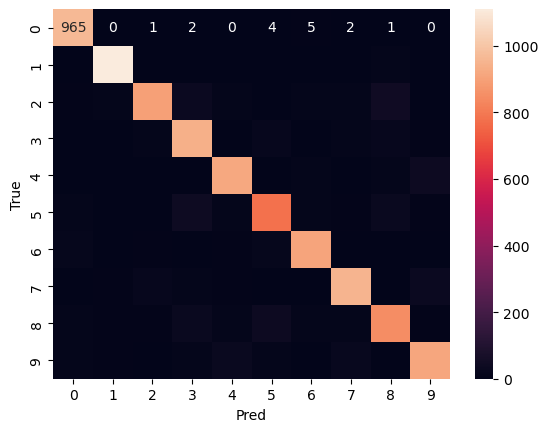

In [17]:
import seaborn as sn 
# plt.figure(figsize = (10,8))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Pred')
plt.ylabel('True')

In [21]:
model = keras.Sequential(
[
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [23]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0428 - accuracy: 0.9867
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0362 - accuracy: 0.9886
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0280 - accuracy: 0.9914
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0236 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0206 - accuracy: 0.9938
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0168 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0145 - accuracy: 0.9956
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0133 - accuracy: 0.9959
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0115 - accuracy: 0.9961
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0

In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.9782


[0.08955476433038712, 0.9782000184059143]

In [26]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [27]:
y_pred_labels = [ np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    1,    0,    2,    2,    2,    2,    1],
       [   0, 1128,    2,    0,    0,    0,    1,    1,    3,    0],
       [   1,    3, 1008,    2,    2,    1,    0,    9,    5,    1],
       [   0,    0,    5,  994,    1,    2,    0,    3,    0,    5],
       [   0,    0,    4,    1,  966,    0,    0,    3,    0,    8],
       [   2,    0,    0,   14,    1,  864,    2,    2,    5,    2],
       [   4,    3,    3,    1,    7,    9,  927,    1,    3,    0],
       [   1,    4,    9,    1,    0,    0,    0, 1007,    2,    4],
       [   4,    0,    4,   14,    3,    3,    0,    3,  934,    9],
       [   1,    2,    0,    4,    6,    5,    0,    6,    1,  984]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'True')

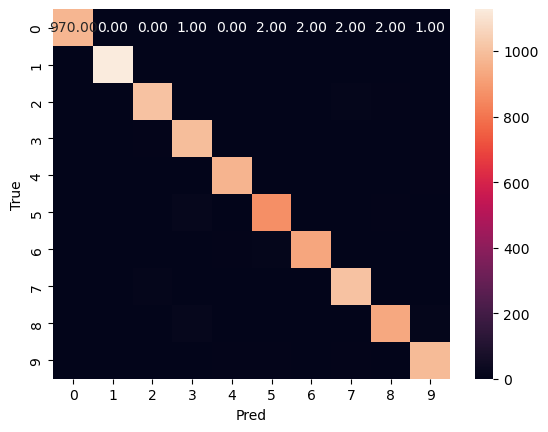

In [30]:
sn.heatmap(cm, annot = True, fmt = '.2f')
plt.xlabel('Pred')
plt.ylabel('True')